
# CODE TO PREDICT STOCK MARKET PRICE
# Dr. Ryan Ahmed @STEMplicity
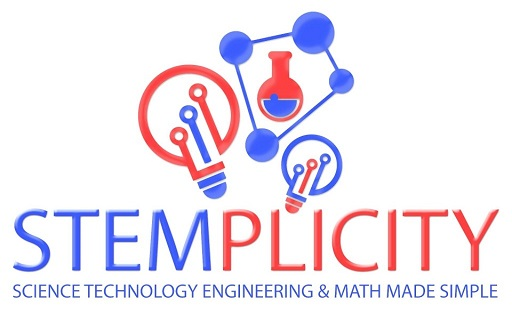



# PROBLEM STATEMENT

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [4]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# STEP #2: VISUALIZE DATASET

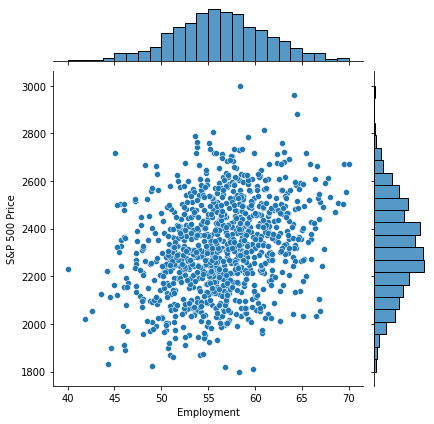

In [6]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

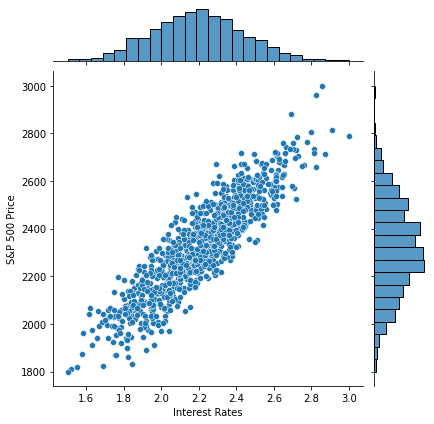

In [7]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

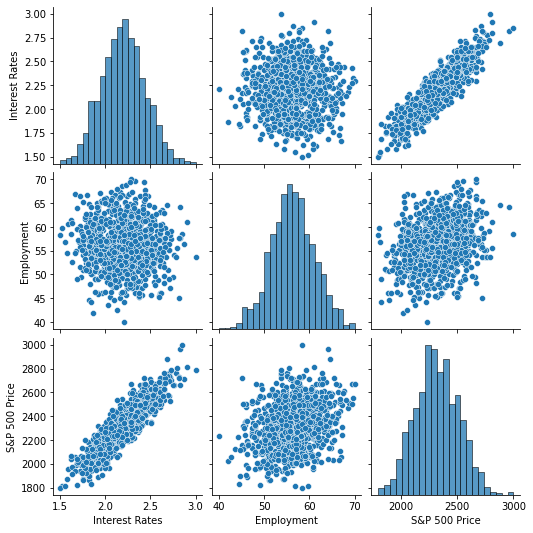

In [8]:
sns.pairplot(stock)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [9]:
y = stock ['S&P 500 Price']

In [10]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [11]:
X = stock[['Interest Rates', 'Employment']]

In [12]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
X_train

,Interest Rates,Employment
585,2.197508,59.029243
307,2.325085,46.054370
380,1.944675,57.034018
332,2.408622,49.936455
412,1.943893,67.155117
...,...,...
403,2.307734,63.440607
514,2.145268,48.545841
148,2.032082,54.862238
930,2.280005,62.207208


In [15]:
X_test

,Interest Rates,Employment
142,2.363962,47.329469
650,2.226845,51.812866
563,2.385757,51.764585
68,2.294610,50.273559
582,2.445537,51.894979
...,...,...
672,2.307061,55.819913
878,2.088906,61.048165
29,2.150986,58.010265
386,2.473496,53.303740


# STEP#4: TRAINING THE MODEL

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept = True)

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [725.03846892  11.93011382]
Linear Model Coefficients (b) 57.03142261633229


# STEP#5: EVALUATING THE MODEL 

In [20]:
y_predict = regressor.predict(X_test)
y_predict

array([2335.64113085, 2289.71343137, 2404.35422228, 2320.48124576,
       2449.25276701, 2160.19998564, 2649.90282858, 2005.73345713,
       2533.90101385, 2351.42123867, 2364.44895988, 2868.38810441,
       2206.55219544, 2110.49505258, 2485.32341889, 2565.96191325,
       2166.99429901, 2339.07025043, 2573.70413334, 2166.83000101,
       2143.13102746, 2056.92628228, 2255.22856274, 2672.52275517,
       2533.19513489, 2643.47577315, 2606.76596882, 1976.25154931,
       2450.75292796, 2152.51468009, 2229.48957032, 2179.48068808,
       2260.37739529, 2515.70616654, 2530.48571696, 2096.22914754,
       2301.85123499, 2399.04894142, 2100.52987631, 2086.54050897,
       2325.17163331, 2200.78088382, 2101.19464876, 2445.26357618,
       2317.26609609, 1974.93809657, 2324.21217436, 2081.61641445,
       2278.14225532, 2161.73678244, 2639.87062465, 2112.70417037,
       2426.6744721 , 2278.53665213, 2253.92131894, 2116.8811917 ,
       2582.40146867, 2454.65049065, 2357.56462453, 2047.23597

In [21]:
y_test

142    2268.189407
650    2410.965587
563    2362.379771
68     2226.020117
582    2412.126316
          ...     
672    2341.632103
878    2398.341821
29     2301.183322
386    2512.975833
401    2260.209586
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

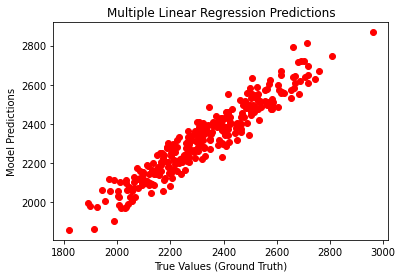

In [22]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [23]:
k = X_test.shape[1]
n = len(X_test)

In [24]:
n

300

In [25]:
k

2

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [27]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  61.026 
MSE = 3724.137418984856 
MAE = 50.629641324349514 
R2 = 0.9074140911958687 
Adjusted R2 = 0.9067906170625075 
MAPE = 2.181605184811892


20% Testing, 80% Training

RMSE =  59.266 
MSE = 3512.4296338986837 
MAE = 46.90704539124721 
R2 = 0.9180495237428291 
Adjusted R2 = 0.9172175392122994 
MAPE = 2.01273653239247

# STEP #6: VISUALIZE THE RESULTS

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [30]:
x_surf.shape

(100, 100)

In [31]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [32]:
onlyX.shape

(10000, 2)

In [33]:
fittedY = regressor.predict(onlyX)

In [34]:
fittedY.shape

(10000,)

In [35]:
fittedY = fittedY.reshape(x_surf.shape)

In [36]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

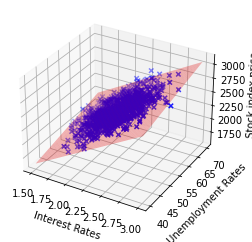

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

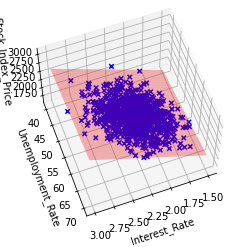

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,725.038469
Employment,11.930114


# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH MULTIPLE LINEAR REGRESSION